# Backbone Summary

In [1]:
import networkx as nx
import pickle as pk
import configparser


import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import numpy as np


config = configparser.ConfigParser()
config.read('networks.ini')
networks = list(config.keys())[1:]

In [2]:
Type = {'business-faculty': 'Social',
 'cs-faculty': 'Social',
 'history-faculty': 'Social',
 'caviar-proj': 'Social',
 'celegans-her': 'Biomedical',
 'celegans-male': 'Biomedical',
 'colombia-calls': 'Social',
 'colombia-mobility': 'Technological',
 'mobility-manizales': 'Technological',
 'mobility-medellin': 'Technological',
 'tennis-loss': 'Social',
 'yeast-grn': 'Biomedical',
 'bike-sharing': 'Technological',
 'giraffe': 'Social',
 'comorbidity': 'Biomedical',
 'phone-calls': 'Social',
 'us-airports': 'Technological',
 'DDI': 'Biomedical',
 'us-weblinks': 'Technological',
 'host-pathogen': 'Biomedical'}

## Backbone Sizes

In [15]:
df_wcc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)
df_scc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    rGstats = f'networks/{folder}/network-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_wcc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_wcc[col][network] = data[network][col]    
    #break
    
    rGstats = f'networks/{folder}/network_lscc-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_scc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_scc[col][network] = data[network][col]    
    
#display(df)
df_wcc.to_csv('Summary/BackboneStats.csv')
df_scc.to_csv('Summary/BackboneStats_LSCC.csv')

### Comparison with Undirected

Here we consider only (for now) the metric and ultrametric case

In [16]:
df_compare = pd.DataFrame(columns=['n_nodes', 'nu_edges', 'nd_edges', 'metric', 'ultrametric', 'metric_avg', 
                                   'ultrametric_avg', 'metric_max', 'ultrametric_max'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    data = pd.read_csv(f'networks/{folder}/undirected-stats.csv', index_col=0)
    
    df_compare['n_nodes'][network] = data['n_nodes']['mlscc']
    df_compare['nu_edges'][network] = data['n_edges']['max']
    df_compare['nd_edges'][network] = data['n_edges']['mlscc']
    
    for btype in ['metric', 'ultrametric']:
        df_compare[btype][network] = data[f'tau_{btype}']['mlscc']
        df_compare[f'{btype}_avg'][network] = data[f'tau_{btype}']['avg']
        df_compare[f'{btype}_max'][network] = data[f'tau_{btype}']['max']
            
    
    #break

#display(df_compare)
#df_wcc.to_csv('Summary/BackboneCompareStats_WCC.csv')
df_compare.drop(index='host-pathogen',axis=0,inplace=True) # Remove SSI which does not have an undirect representation
df_compare.to_csv('Summary/BackboneCompareStats.csv')

## Plotting

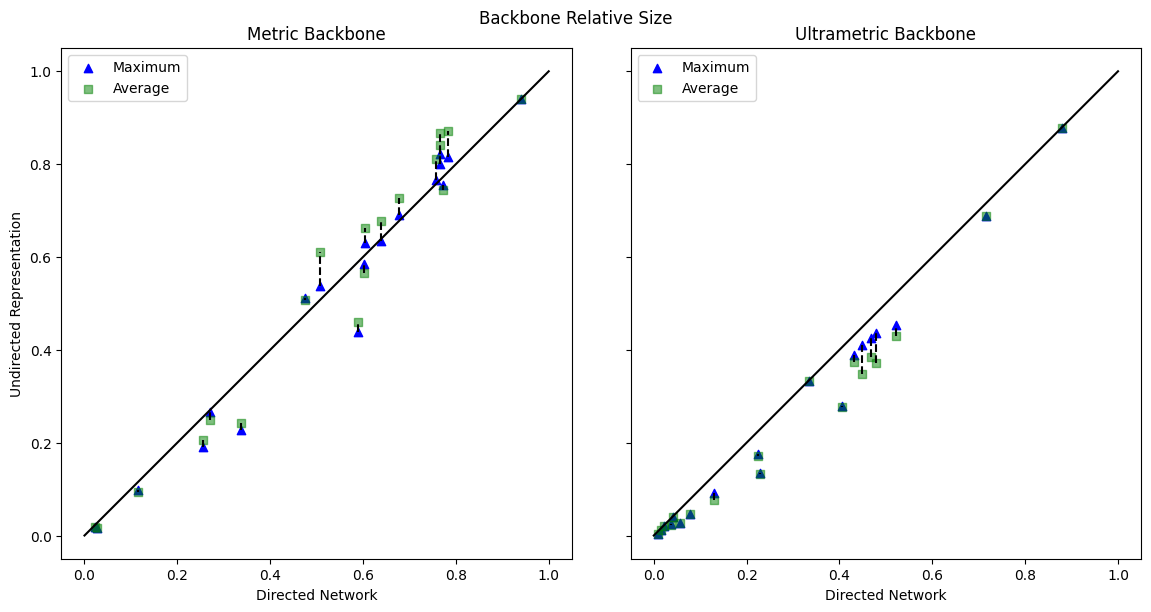

In [5]:
df = pd.read_csv('Summary/BackboneCompareStats.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Same commands for both axis
for i, btype in enumerate(['metric', 'ultrametric']):
    ax[i].scatter(df[btype], df[f'{btype}_max'], marker='^', c='b', label='Maximum')
    ax[i].scatter(df[btype], df[f'{btype}_avg'], marker='s', c='g', label='Average', alpha=0.5)

    ax[i].vlines(df[btype], ymin=df[[f'{btype}_max', f'{btype}_avg']].min(axis=1), ymax=df[[f'{btype}_max', f'{btype}_avg']].max(axis=1), linestyle='--', color='k')
    ax[i].plot([0, 1], [0, 1], 'k-')
    
    ax[i].legend()
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network')
    ax[i].set_title(btype.capitalize() + ' Backbone')
    
# Labels
ax[0].set_ylabel('Undirected Representation')
fig.suptitle('Backbone Relative Size')

plt.tight_layout()
plt.show()

In [6]:
display(df)

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
business-faculty,84,488,976,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230
cs-faculty,78,179,358,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514
history-faculty,56,158,316,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889
celegans-her,215,558,1116,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731
celegans-male,238,634,1268,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156


In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

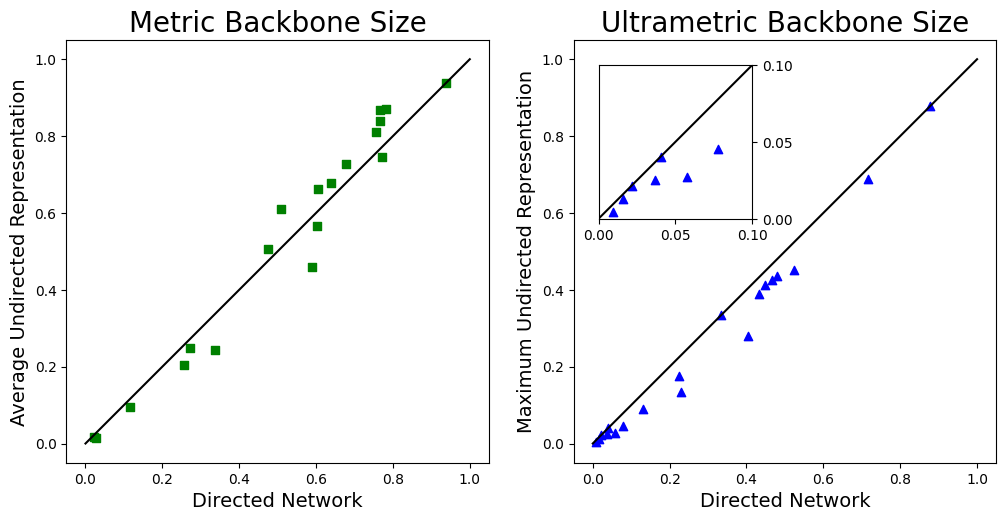

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Same commands for both axis

ax[0].scatter(df['metric'], df[f'metric_avg'], marker='s', c='g', label='Average')
ax[1].scatter(df['ultrametric'], df[f'ultrametric_max'], marker='^', c='b', label='Maximum')

for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network', fontsize=14)

ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel('Average Undirected Representation', fontsize=14)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel('Maximum Undirected Representation', fontsize=14)

# Add Ultrametric inset
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)
axes.scatter(df['ultrametric'], df['ultrametric_max'], marker='^', c='b', label='Maximum')
axes.plot([0, 0.1], [0, 0.1], 'k-')

axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])

#plt.tight_layout()
plt.draw()
plt.show()

## Non-Reciprocal Paths

### Some clear difference in the distribution?
Not really

Undirected


/tmp/ipykernel_6416/3112305841.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[network] = np.log10(np.array(list(weights.values())))
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


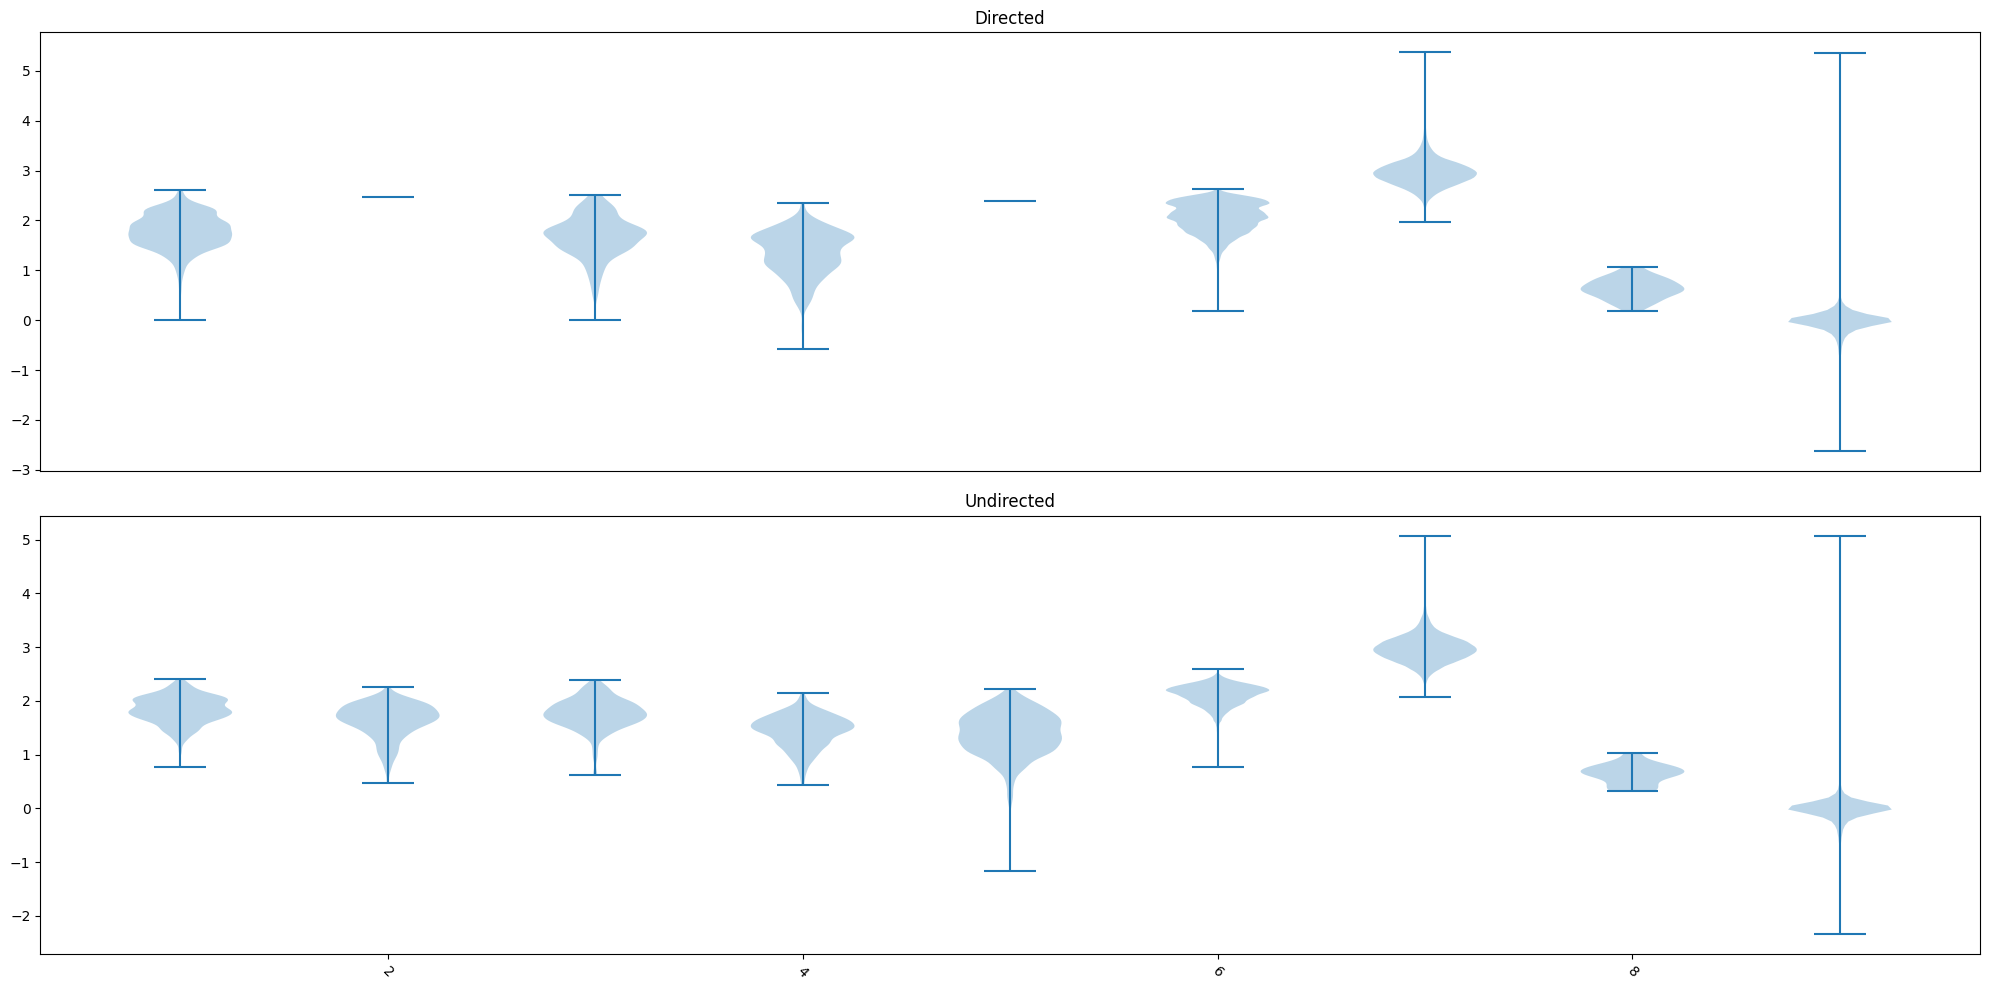

Directed


/tmp/ipykernel_6416/3112305841.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[network] = np.log10(np.array(list(weights.values())))
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


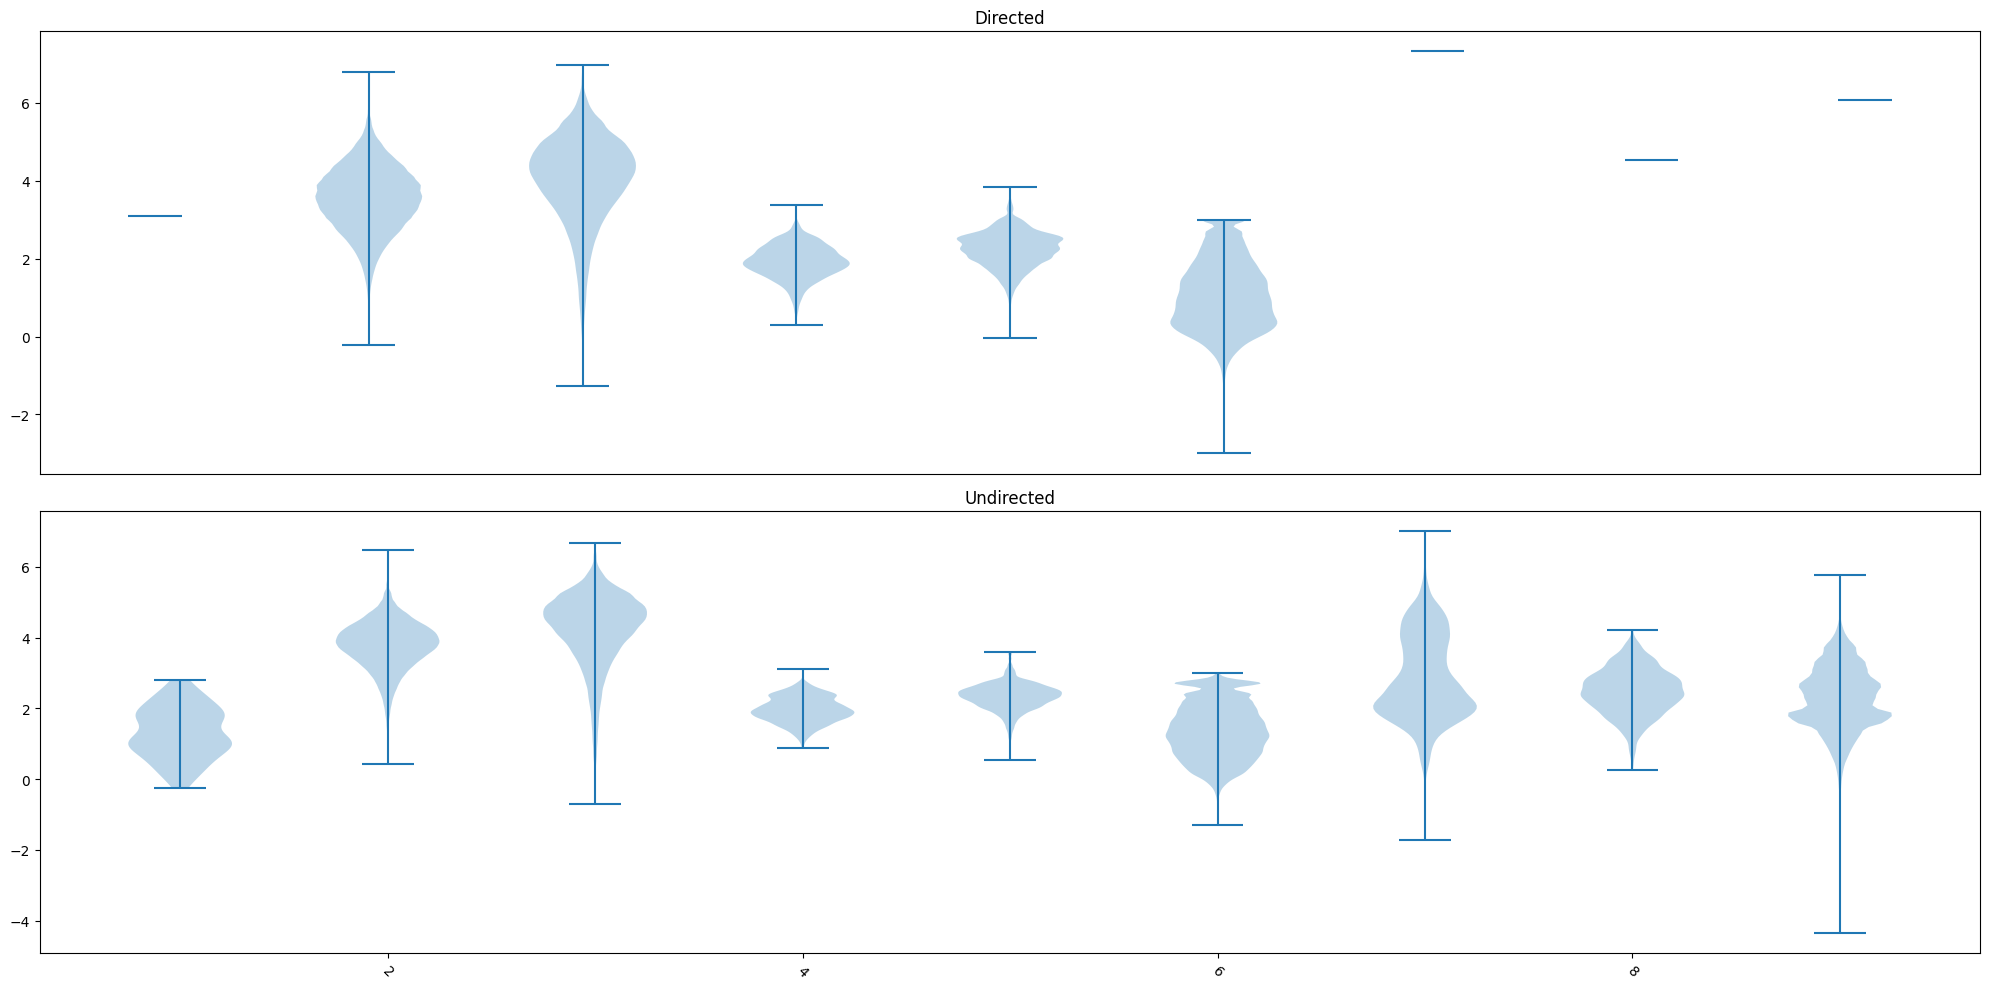

In [77]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    und_dist = dict.fromkeys(df.index)
    dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist[network] = np.log10(np.repeat(list(weights.values()), 2))

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        dist[network] = np.log10(np.array(list(weights.values())))
        #print(und_dist)
        
        #plt.boxplot([np.log10(dist), np.log10(und_dist)], labels=['Directed', 'Undirected'])
        #plt.title(network)
        
        
    fig, ax = plt.subplots(2, 1, figsize=(20, 10))

    ax[0].violinplot(dist.values())
    ax[0].set_title('Directed')
    ax[0].set_xticks([])

    ax[1].violinplot(und_dist.values())#, labels=und_dist.keys())
    ax[1].set_title('Undirected')
    plt.xticks(rotation=315)
    
    plt.tight_layout()
    plt.show()

    #break

### KL Divergence?

Most of the directed have infinity KL divergence. 
This is found because there are regions of zero probability in the directed weights distribution, which are finite in the undirected weights.

In [29]:
from scipy.stats import entropy

In [51]:
def kl_div(p, q):
    
    if len(p) != len(q):
        raise ArithmeticError
    
    h = 0
    for i in range(len(p)):
        if p[i] > 0.0:
            h += p[i]*np.log(p[i]/q[i])
            #print(h, q[i])
    
    return h

In [75]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    #und_dist = dict.fromkeys(df.index)
    #dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        dist = np.array(list(weights.values()))

        Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist = np.repeat(list(weights.values()), 2)

        P, _ = np.histogram(np.log10(und_dist), range=(dist.min(), dist.max()), bins=bins, density=True)

        #print(Q, P)
        print(network, kl_div(P, Q))
        #break
    #break

Undirected
business-faculty 1.0196907910730035
cs-faculty 0.5309229745511237
history-faculty 1.044855628703406
celegans-her 0.8737080928362628
celegans-male 0.36658335052997004


/tmp/ipykernel_6416/1978712345.py:16: RuntimeWarning: divide by zero encountered in log10
  Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)


tennis-loss 3.7146677421263647


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


bike-sharing 0
giraffe 0


/tmp/ipykernel_6416/1402818324.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  h += p[i]*np.log(p[i]/q[i])
/tmp/ipykernel_6416/1978712345.py:16: RuntimeWarning: divide by zero encountered in log10
  Q, bins = np.histogram(np.log10(dist), range=(dist.min(), dist.max()), bins='doane', density=True)


comorbidity inf
Directed
caviar-proj 0.23594483666168217
colombia-calls 0.33010820834486765
colombia-mobility 0.12489016150470515
mobility-manizales inf


/tmp/ipykernel_6416/1402818324.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  h += p[i]*np.log(p[i]/q[i])


mobility-medellin 0.4094341831614
yeast-grn inf
us-airports 0.16446502666768484
DDI 0.5812042913574671
us-weblinks 0.19307149193515338


### Is the undirected distance distribution statistically identical to the distribution of the sum (average) of the directed distances?
Yeah, it seems to be identical in both cases

In [70]:
from scipy.stats import mannwhitneyu, wilcoxon

In [74]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    #und_dist = dict.fromkeys(df.index)
    #dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        orig_dist = np.array(list(weights.values()))

        dist = np.zeros(orig_dist.shape)
        for i in range(len(dist)):
            dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist = np.log10(np.repeat(list(weights.values()), 2))

        #print(Q, P)
        print(network, wilcoxon(x=dist, y=und_dist))
        #break
    #break

Undirected
business-faculty WilcoxonResult(statistic=nan, pvalue=nan)
cs-faculty WilcoxonResult(statistic=nan, pvalue=nan)
history-faculty WilcoxonResult(statistic=nan, pvalue=nan)
celegans-her WilcoxonResult(statistic=nan, pvalue=nan)
celegans-male WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


tennis-loss WilcoxonResult(statistic=nan, pvalue=nan)
bike-sharing WilcoxonResult(statistic=nan, pvalue=nan)
giraffe WilcoxonResult(statistic=nan, pvalue=nan)
comorbidity WilcoxonResult(statistic=nan, pvalue=nan)
Directed
caviar-proj WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


colombia-calls WilcoxonResult(statistic=nan, pvalue=nan)
colombia-mobility WilcoxonResult(statistic=nan, pvalue=nan)
mobility-manizales WilcoxonResult(statistic=nan, pvalue=nan)
mobility-medellin WilcoxonResult(statistic=nan, pvalue=nan)
yeast-grn WilcoxonResult(statistic=nan, pvalue=nan)
us-airports WilcoxonResult(statistic=nan, pvalue=nan)
DDI WilcoxonResult(statistic=nan, pvalue=nan)
us-weblinks WilcoxonResult(statistic=nan, pvalue=nan)


### Ultrametric

In [17]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    df = pd.read_csv(f'Summary/Ultrametric_UnreciprocalPaths_{group}.csv', index_col=0)
    for etype in ['partial', 'complete', 'total']:
        df[f'percent_{etype}'] = df[f'{etype}_undirected']/df[etype]
    display(df[['percent_partial', 'percent_complete', 'percent_total']])

,percent_partial,percent_complete,percent_total
business-faculty,0.269912,0.020690,0.209380
cs-faculty,0.300000,0.000000,0.259259
history-faculty,0.426471,0.035714,0.359756
celegans-her,0.361538,0.042857,0.323729
celegans-male,0.295000,0.074074,0.248031
tennis-loss,0.167921,0.010197,0.120653
bike-sharing,0.042053,0.000506,0.035435
giraffe,0.200000,0.000000,0.190476
comorbidity,0.016151,0.000000,0.013701


,percent_partial,percent_complete,percent_total
caviar-proj,0.571429,0.000000,0.533333
colombia-calls,0.162546,0.004398,0.078122
colombia-mobility,0.232911,0.002747,0.160312
mobility-manizales,0.064846,0.000000,0.050667
mobility-medellin,0.065156,0.000604,0.041304
yeast-grn,0.452036,0.027524,0.153046
us-airports,0.193631,0.005839,0.136585
DDI,0.335766,0.015152,0.231527
us-weblinks,0.246552,0.063891,0.218780


In [9]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    df = pd.read_csv(f'Summary/Metric_UnreciprocalPaths_{group}.csv', index_col=0)
    for etype in ['partial', 'complete', 'total']:
        df[f'percent_{etype}'] = df[f'{etype}_undirected']/df[etype]
    display(df[['percent_partial', 'percent_complete', 'percent_total']])

,percent_partial,percent_complete,percent_total
business-faculty,0.587379,0.117647,0.450172
cs-faculty,0.770833,0.230769,0.655738
history-faculty,0.636364,0.125000,0.571429
celegans-her,0.696429,0.281250,0.630000
celegans-male,0.615764,0.100000,0.469965
tennis-loss,0.641080,0.164267,0.462470
bike-sharing,0.563248,0.105650,0.429685
giraffe,0.666667,0.500000,0.600000
comorbidity,0.580407,0.050304,0.306935


,percent_partial,percent_complete,percent_total
caviar-proj,0.333333,0.000000,0.250000
colombia-calls,0.125423,0.000470,0.005030
colombia-mobility,0.155860,0.000105,0.002253
mobility-manizales,0.352657,0.008658,0.115097
mobility-medellin,0.283892,0.010450,0.108277
yeast-grn,0.263634,0.028606,0.074338
us-airports,0.166667,0.003956,0.075300
DDI,0.210756,0.027149,0.166117
us-weblinks,0.315993,0.056226,0.214408


## Whatever, lets just consider it is what it is

In [8]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Metric_UnreciprocalPaths_{group:s}.csv'.format(group=group), index_col=0)
    print(df.total_undirected/df.total)

Undirected
business-faculty    0.450172
cs-faculty          0.655738
history-faculty     0.571429
celegans-her        0.630000
celegans-male       0.469965
tennis-loss         0.462470
bike-sharing        0.429685
giraffe             0.600000
comorbidity         0.306935
dtype: float64
Directed
caviar-proj           0.250000
colombia-calls        0.005030
colombia-mobility     0.002253
mobility-manizales    0.115097
mobility-medellin     0.108277
yeast-grn             0.074338
us-airports           0.075300
DDI                   0.166117
us-weblinks           0.214397
dtype: float64


In [9]:
for group in ['Undirected']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Ultrametric_UnreciprocalPaths_{group:s}.csv'.format(group=group), index_col=0)
    print(df.total_undirected/df.total)

Undirected
business-faculty    0.388514
cs-faculty          0.476190
history-faculty     0.439394
celegans-her        0.542453
celegans-male       0.364238
tennis-loss         0.347717
bike-sharing        0.317594
giraffe             0.400000
comorbidity         0.247766
dtype: float64


### Distortions

In [27]:
from scipy.stats import mannwhitneyu

In [53]:
alternative = {'Undirected':'greater', 'Directed':'two-sided'}

AUC = {'less': 0.0, 'two-sided': 0.0, 'greater': 0.0}
p = {'less': 0.0, 'two-sided': 0.0, 'greater': 0.0}

for group in ['Undirected', 'Directed']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)
    
    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        svals_dir = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))

        svals_undir = pk.load(open(f'networks/{folder}/undirected_distortions.pickle', 'rb'))

        X = np.log10(list(svals_dir['ultrametric'].values()))
        Y = np.log10(list(svals_undir['max']['ultrametric'].values()))
        for alternative in AUC.keys():
            U, p[alternative] = mannwhitneyu(X, Y, alternative=alternative, method='asymptotic')
            AUC[alternative] = U/(len(X)*len(Y))
        
        #prefered = min(p, key=p.get)
        #print(f"'{network}': '{prefered}'")
        print(network, p, AUC)
        

Undirected
business-faculty {'less': 0.8308026087078766, 'two-sided': 0.3386455161421795, 'greater': 0.16932275807108976} {'less': 0.5234964813211206, 'two-sided': 0.5234964813211206, 'greater': 0.5234964813211206}
cs-faculty {'less': 0.08347579706172342, 'two-sided': 0.16695159412344684, 'greater': 0.9170654887239925} {'less': 0.43523573200992555, 'two-sided': 0.43523573200992555, 'greater': 0.43523573200992555}
history-faculty {'less': 0.6291241489011438, 'two-sided': 0.7446159533208381, 'greater': 0.37230797666041904} {'less': 0.5159241531664213, 'two-sided': 0.5159241531664213, 'greater': 0.5159241531664213}
celegans-her {'less': 0.5027029985570988, 'two-sided': 0.9950264768100052, 'greater': 0.4975132384050026} {'less': 0.5001630589865884, 'two-sided': 0.5001630589865884, 'greater': 0.5001630589865884}
celegans-male {'less': 0.5248227746798486, 'two-sided': 0.9508578253031204, 'greater': 0.4754289126515602} {'less': 0.5016445160424218, 'two-sided': 0.5016445160424218, 'greater': 0

# Components

In [27]:
df = pd.DataFrame(index=networks, columns=['isolates', 'tuples', 'chains', 'star', 'tree', 'complete', 'components'])

#focus_nets = ['cs-faculty', 'celegans-her', 'celegans-male', 'us-weblinks', 'phone-calls']
for network in networks:
    folder = config[network].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    nx.set_edge_attributes(G, values=None, name='alpha')
    
    U = nx.Graph()
    U.add_nodes_from(G.nodes())
    
    for u, v, w in G.edges(data=True):
        if w['alpha'] == None:
            G[u][v]['alpha'] = 0.0
            din = G[u][v]['distance']

            if G.has_edge(v, u):
                G[v][u]['alpha'] = 0.0
                dout = G[v][u]['distance']            
                U.add_edge(u, v, avg_distance=0.5*(din + dout), max_distance=max(din, dout))
    
    df['components'][network] = nx.number_connected_components(U)
    U.remove_nodes_from(max(nx.connected_components(U), key=len))

    df['isolates'][network] = nx.number_of_isolates(U)
    U.remove_nodes_from(list(nx.isolates(U)))

    if nx.is_empty(U):
        df['tuples'][network] = 0
        df['chains'][network] = 0
        df['complete'][network] = 0
        df['star'][network] = 0
        df['tree'][network] = 0
        continue

    # Check for tuples
    counter = 0
    in_group = set()
    for cc in nx.connected_components(U):
        if len(cc) == 2:
            counter += 1
            in_group.update(cc)

    df['tuples'][network] = counter
    U.remove_nodes_from(in_group)

    if nx.is_empty(U):
        df['chains'][network] = 0
        df['complete'][network] = 0
        df['star'][network] = 0
        df['tree'][network] = 0
        continue

    # Check for linear chains
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    in_group = set()
    counter = 0 
    for cc in CC:
        if nx.is_isomorphic(cc, nx.path_graph(len(cc))):
            in_group.update(cc)
            counter += 1
    
    df['chains'][network] = counter
    U.remove_nodes_from(in_group)
    
    # Check for complete graphs
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    counter = 0
    in_group = set()
    for cc in CC:
        if nx.is_isomorphic(cc, nx.complete_graph(len(cc))):
            in_group.update(cc)
            counter += 1
    
    df['complete'][network] = counter
    U.remove_nodes_from(in_group)
    
    # Check for Star Graphs
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    counter = 0
    in_group = set()
    for cc in CC:
        if nx.is_isomorphic(cc, nx.star_graph(len(cc)-1)):
            in_group.update(cc)
            counter += 1
    
    df['star'][network] = counter
    U.remove_nodes_from(in_group)
    
    # Check for Trees
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    counter = 0
    in_group = set()
    for cc in CC:
        if nx.is_tree(cc):
            in_group.update(cc)
            counter += 1
    
    df['tree'][network] = counter
    U.remove_nodes_from(in_group)

    if not nx.is_empty(U):
        print(network)
        wGraphml = 'networks/{folder:s}/undirected_nontrivial_subnetwork.graphml'.format(folder=folder)
        nx.write_graphml(U, wGraphml)

df.to_csv('Summary/Components_Described.csv')

phone-calls
us-weblinks


In [30]:
display(df)

,isolates,tuples,chains,star,tree,complete,components
business-faculty,29,0,0,0,0,0,30
cs-faculty,114,2,3,0,0,0,120
history-faculty,81,4,0,0,0,0,86
caviar-proj,47,0,0,0,0,0,48
celegans-her,82,3,3,0,0,0,89
celegans-male,76,4,2,0,0,0,83
colombia-calls,0,0,0,0,0,0,1
colombia-mobility,0,0,0,0,0,0,1
mobility-manizales,0,0,0,0,0,0,1
mobility-medellin,0,0,0,0,0,0,1


In [36]:
df['irreducible'] = df.isolates + df.tuples + df.chains + df.star + df.tree

In [39]:
df['reducible'] = df.components - df.irreducible

In [42]:
df.components.describe()

count     20
unique    14
top        1
freq       7
Name: components, dtype: int64

In [41]:
df.reducible.describe()

count     20
unique     3
top        1
freq      18
dtype: int64

In [43]:
df.irreducible/df.components

business-faculty      0.966667
cs-faculty            0.991667
history-faculty       0.988372
caviar-proj           0.979167
celegans-her          0.988764
celegans-male         0.987952
colombia-calls             0.0
colombia-mobility          0.0
mobility-manizales         0.0
mobility-medellin          0.0
tennis-loss           0.999664
yeast-grn               0.9998
bike-sharing          0.666667
giraffe                    0.0
comorbidity                0.0
phone-calls           0.955128
us-airports           0.993197
DDI                        0.0
us-weblinks           0.995169
host-pathogen         0.999905
dtype: object

# Backbone of Phone-Calls and US Weblinks

In [50]:
focus_nets = ['us-weblinks', 'phone-calls']
for network in focus_nets:
    folder = config[network].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    nx.set_edge_attributes(G, values=None, name='alpha')
    
    U = nx.Graph()
    U.add_nodes_from(G.nodes())
    
    for u, v, w in G.edges(data=True):
        if w['alpha'] == None:
            G[u][v]['alpha'] = 0.0
            din = G[u][v]['distance']

            if G.has_edge(v, u):
                G[v][u]['alpha'] = 0.0
                dout = G[v][u]['distance']            
                U.add_edge(u, v, avg_distance=0.5*(din + dout), max_distance=max(din, dout))
    
    U.remove_nodes_from(list(nx.isolates(U)))

    # Check for tuples
    '''
    in_group = set()
    for cc in nx.connected_components(U):
        if len(cc) == 2:
            in_group.update(cc)
    U.remove_nodes_from(in_group)
    '''

    # Check for linear chains
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    in_group = set()
    for cc in CC:
        if nx.is_isomorphic(cc, nx.path_graph(len(cc))):
            in_group.update(cc)
        elif nx.is_isomorphic(cc, nx.star_graph(len(cc)-1)):
            in_group.update(cc)
        elif nx.is_tree(cc):
            in_group.update(cc)

    U.remove_nodes_from(in_group)

    D = G.edge_subgraph(U.to_directed().edges())

    nx.write_graphml(D, 'networks/new_undirected/{folder:s}/directed.graphml'.format(folder=folder))
    nx.write_graphml(U, 'networks/new_undirected/{folder:s}/undirected.graphml'.format(folder=folder))
    

In [2]:
import distanceclosure as dc

In [53]:
focus_nets = ['phone-calls', 'us-weblinks']
for network in focus_nets:
    print(network)
    folder = config[network].get('folder')
    
    
    D = nx.read_graphml('networks/new_undirected/{folder:s}/directed.graphml'.format(folder=folder))

    svals = {'metric': dict(), 'ultrametric': dict()}

    Bm, svals['metric'] = dc.backbone(D, weight='distance', kind='metric', distortion=True) #dc.metric_backbone(D, weight='distance', distortion=True)
    Bu, svals['ultrametric'] = dc.backbone(D, weight='distance', kind='ultrametric', distortion=True)

    nx.set_edge_attributes(Bm, name='ultrametric', values={(u, v): Bu.has_edge(u, v) for u, v in Bm.edges()})
    nx.write_graphml(Bm, 'networks/new_undirected/{folder:s}/directed_backbone.graphml'.format(folder=folder))

    pk.dump(svals, open('networks/new_undirected/{folder:s}/directed_distortions.pk'.format(folder=folder), 'wb'))

    print('Directed Done')
    '''
    U = nx.read_graphml('networks/new_undirected/{folder:s}/undirected.graphml'.format(folder=folder))
    
    for type in ['avg', 'max']:
        svals = {'metric': dict(), 'ultrametric': dict()}
        
        weight = '{type:s}_distance'.format(type=type)

        Bm, svals['metric'] = dc.backbone(U, weight=weight, kind='metric', distortion=True) #dc.metric_backbone(U, weight='avg_distance', distortion=True)
        Bu, svals['ultrametric'] = dc.backbone(U, weight=weight, kind='ultrametric', distortion=True)

        nx.set_edge_attributes(Bm, name='ultrametric', values={(u, v): Bu.has_edge(u, v) for u, v in Bm.edges()})
        nx.write_graphml(Bm, 'networks/new_undirected/{folder:s}/{type:s}_undirected_backbone.graphml'.format(folder=folder, type=type))
        
        pk.dump(svals, open('networks/new_undirected/{folder:s}/{type:s}_undirected_distortions.pk'.format(folder=folder, type=type), 'wb'))

    print('Undirected Done')
    '''

phone-calls
Directed Done
us-weblinks
Directed Done


In [6]:
df_bbsize = pd.read_csv('Summary/BackboneCompareStats.csv', index_col=0)
display(df_bbsize.T['us-weblinks'])
display(df_bbsize.T['phone-calls'])

n_nodes            18112.000000
nu_edges           49855.000000
nd_edges           99710.000000
metric                 0.601785
ultrametric            0.479711
metric_avg             0.565801
ultrametric_avg        0.371858
metric_max             0.585017
ultrametric_max        0.436546
Name: us-weblinks, dtype: float64

n_nodes            30.000000
nu_edges           33.000000
nd_edges           66.000000
metric              0.939394
ultrametric         0.878788
metric_avg          0.939394
ultrametric_avg     0.878788
metric_max          0.939394
ultrametric_max     0.878788
Name: phone-calls, dtype: float64

In [48]:
focus_nets = ['us-weblinks', 'phone-calls']
for network in focus_nets:
    print(network)
    folder = config[network].get('folder')

    D = nx.read_graphml('networks/new_undirected/{folder:s}/directed.graphml'.format(folder=folder))
    Db = nx.read_graphml('networks/new_undirected/{folder:s}/directed_backbone.graphml'.format(folder=folder))

    U = nx.read_graphml('networks/new_undirected/{folder:s}/undirected.graphml'.format(folder=folder))
    Ub = nx.read_graphml('networks/new_undirected/{folder:s}/undirected_backbone.graphml'.format(folder=folder))

    n_nodes = D.number_of_nodes()
    nd_edges = D.number_of_edges()
    
    metric = Db.number_of_edges()/nd_edges
    ultrametric = sum([int(w) for _, _, w in Db.edges(data='ultrametric')])/nd_edges

    nu_edges = U.number_of_edges()

    avg_metric = Ub.number_of_edges()/nu_edges
    max_ultrametric = sum([int(w) for _, _, w in Ub.edges(data='ultrametric')])/nu_edges

    print(f'{n_nodes=}')
    print(f'{nu_edges=}')
    print(f'{nd_edges=}')

    print(f'{metric=} VS {avg_metric=}')
    print(f'{ultrametric=} VS {max_ultrametric=}')

    print(metric>=avg_metric)
    print(ultrametric>=max_ultrametric)

us-weblinks
n_nodes=19709
nu_edges=53887
nd_edges=107774
metric=0.6078553268877466 VS avg_metric=0.5710097054948318
ultrametric=0.48342828511514835 VS max_ultrametric=0.43652457921205484
True
True
phone-calls
n_nodes=83
nu_edges=89
nd_edges=178
metric=0.9044943820224719 VS avg_metric=0.9101123595505618
ultrametric=0.8539325842696629 VS max_ultrametric=0.8539325842696629
False
True


In [42]:
component_stats = {'phone-calls': {'nodes': [], 'edges': [], 'm_edges': [], 'u_edges': [], 'avg_m_edges': [], 'max_u_edges': []},
                   'us-weblinks': {'nodes': [], 'edges': [], 'm_edges': [], 'u_edges': [], 'avg_m_edges': [], 'max_u_edges': []}}
#focus_nets = ['us-weblinks', 'phone-calls']
for network in component_stats.keys():
    print(network)
    folder = config[network].get('folder')

    #D = nx.read_graphml('networks/new_undirected/{folder:s}/directed.graphml'.format(folder=folder))
    Db = nx.read_graphml('networks/new_undirected/{folder:s}/directed_backbone.graphml'.format(folder=folder))

    U = nx.read_graphml('networks/new_undirected/{folder:s}/undirected.graphml'.format(folder=folder))
    Ub = nx.read_graphml('networks/new_undirected/{folder:s}/undirected_backbone.graphml'.format(folder=folder))

    for cc in nx.connected_components(U):
        
        component_stats[network]['nodes'].append(len(cc))
        nedges = U.subgraph(cc).number_of_edges()
        component_stats[network]['edges'].append(nedges)

        g = Db.subgraph(cc).copy()
        component_stats[network]['m_edges'].append(g.number_of_edges())
        um_edges = sum([int(w) for _, _, w in g.edges(data='ultrametric')])
        component_stats[network]['u_edges'].append(um_edges)

        g = Ub.subgraph(cc).copy()
        component_stats[network]['avg_m_edges'].append(g.number_of_edges())
        um_edges = sum([int(w) for _, _, w in g.edges(data='ultrametric')])
        component_stats[network]['max_u_edges'].append(um_edges)
    
    for key, val in component_stats[network].items():
        component_stats[network][key] = np.array(val)


phone-calls
us-weblinks


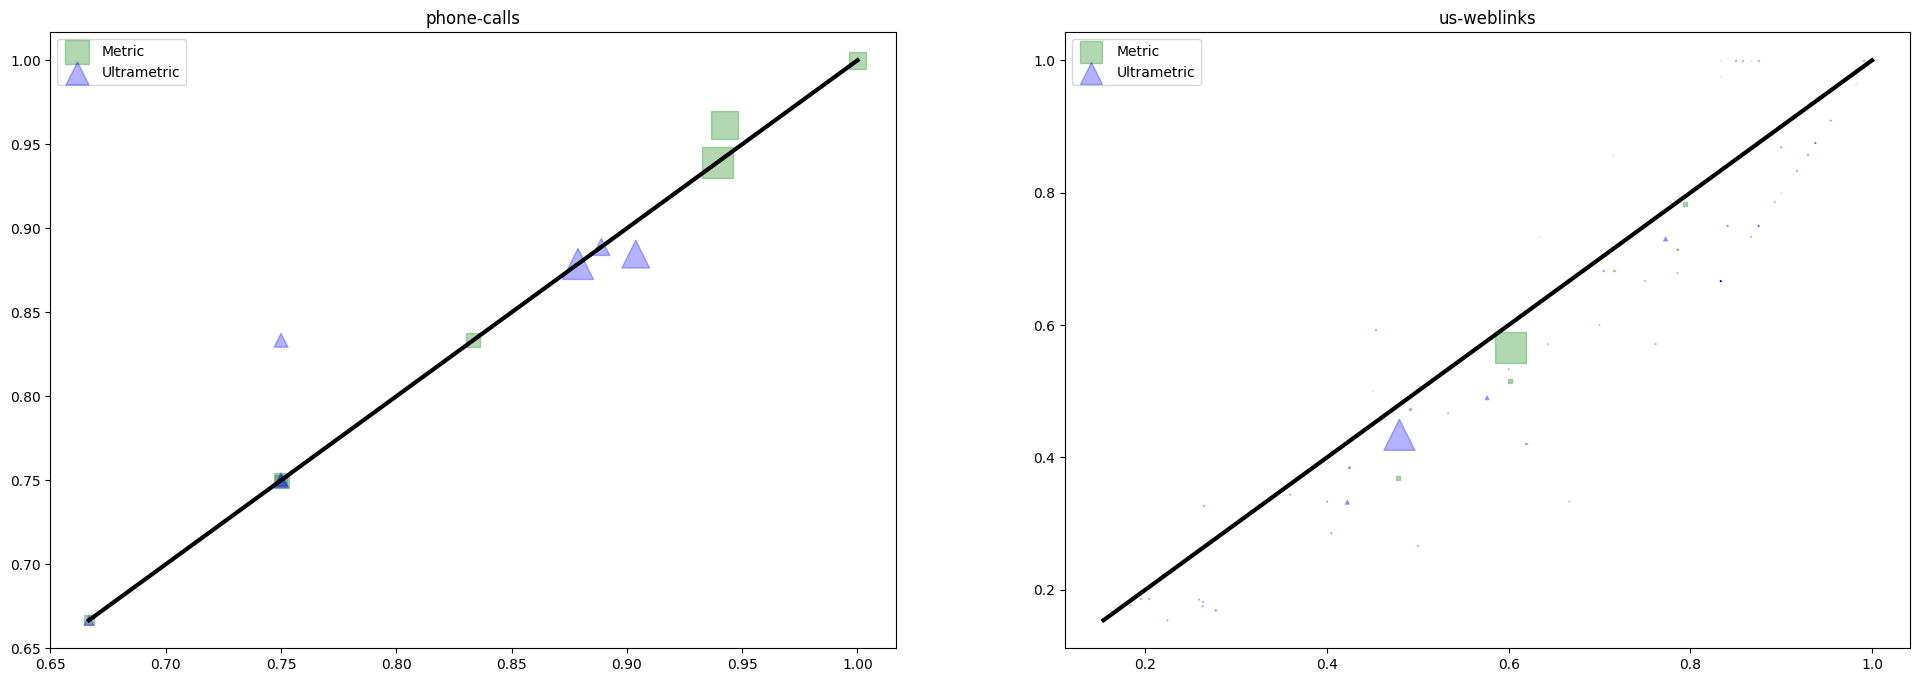

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 8))

for idx, network in enumerate(component_stats.keys()):
    sizes = [500*s/max(component_stats[network]['nodes'][0:]) for s in component_stats[network]['nodes'][0:]]
    
    X = 0.5*component_stats[network]['m_edges'][0:]/component_stats[network]['edges'][0:]
    Y = component_stats[network]['avg_m_edges'][0:]/component_stats[network]['edges'][0:]
    ax[idx].scatter(X, Y, marker='s', color='g', label='Metric', alpha=0.3, s=sizes)

    Z = 0.5*component_stats[network]['u_edges'][0:]/component_stats[network]['edges'][0:]
    W = component_stats[network]['max_u_edges'][0:]/component_stats[network]['edges'][0:]
    ax[idx].scatter(Z, W, marker='^', color='b', label='Ultrametric', alpha=0.3, s=sizes)

    vmin = min([min(X), min(Y), min(Z), min(W)])
    vmax = max([max(X), max(Y), max(Z), max(W)])
    
    ax[idx].plot([vmin, vmax], [vmin, vmax], 'k-', lw=3)
    ax[idx].set_title(network)
    ax[idx].legend()

In [47]:
for network in component_stats.keys():
    Z = 0.5*component_stats[network]['u_edges']/component_stats[network]['edges']
    W = component_stats[network]['max_u_edges']/component_stats[network]['edges']
    print(network, Z, W)
    break

phone-calls [0.87878788 0.90384615 0.75       0.75       0.88888889 0.66666667
 0.75      ] [0.87878788 0.88461538 0.75       0.83333333 0.88888889 0.66666667
 0.75      ]


In [40]:
component_stats['us-weblinks']['nodes'][0]

18112

# Including Non-Reducible

In [50]:
networks

['business-faculty',
 'cs-faculty',
 'history-faculty',
 'caviar-proj',
 'celegans-her',
 'celegans-male',
 'colombia-calls',
 'colombia-mobility',
 'mobility-manizales',
 'mobility-medellin',
 'tennis-loss',
 'yeast-grn',
 'bike-sharing',
 'giraffe',
 'comorbidity',
 'phone-calls',
 'us-airports',
 'DDI',
 'us-weblinks',
 'host-pathogen']

In [51]:
focus_nets = ['cs-faculty', 'history-faculty', 'celegans-her', 'celegans-male', 'tennis-loss', 'phone-calls', 'us-airports', 'us-weblinks']
for network in focus_nets:
    folder = config[network].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    nx.set_edge_attributes(G, values=None, name='alpha')
    
    U = nx.Graph()
    U.add_nodes_from(G.nodes())
    
    for u, v, w in G.edges(data=True):
        if w['alpha'] == None:
            G[u][v]['alpha'] = 0.0
            din = G[u][v]['distance']

            if G.has_edge(v, u):
                G[v][u]['alpha'] = 0.0
                dout = G[v][u]['distance']            
                U.add_edge(u, v, avg_distance=0.5*(din + dout), max_distance=max(din, dout))
    
    U.remove_nodes_from(list(nx.isolates(U)))
    
    '''
    # Check for linear chains
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    in_group = set()
    for cc in CC:
        if nx.is_isomorphic(cc, nx.path_graph(len(cc))):
            in_group.update(cc)
        elif nx.is_isomorphic(cc, nx.star_graph(len(cc)-1)):
            in_group.update(cc)
        elif nx.is_tree(cc):
            in_group.update(cc)

    U.remove_nodes_from(in_group)
    '''

    D = G.edge_subgraph(U.to_directed().edges())

    nx.write_graphml(D, 'networks/new_undirected/{folder:s}/directed_wtrees.graphml'.format(folder=folder))
    nx.write_graphml(U, 'networks/new_undirected/{folder:s}/undirected_wtrees.graphml'.format(folder=folder))

In [52]:
for network in focus_nets:
    print(network)
    folder = config[network].get('folder')
    
    D = nx.read_graphml('networks/new_undirected/{folder:s}/directed_wtrees.graphml'.format(folder=folder))

    svals = {'metric': dict(), 'ultrametric': dict()}

    Bm, svals['metric'] = dc.backbone(D, weight='distance', kind='metric', distortion=True) #dc.metric_backbone(D, weight='distance', distortion=True)
    Bu, svals['ultrametric'] = dc.backbone(D, weight='distance', kind='ultrametric', distortion=True)

    nx.set_edge_attributes(Bm, name='ultrametric', values={(u, v): Bu.has_edge(u, v) for u, v in Bm.edges()})
    nx.write_graphml(Bm, 'networks/new_undirected/{folder:s}/directed_backbone_wtrees.graphml'.format(folder=folder))

    pk.dump(svals, open('networks/new_undirected/{folder:s}/directed_distortions_wtrees.pk'.format(folder=folder), 'wb'))

    print('Directed Done')
    
    U = nx.read_graphml('networks/new_undirected/{folder:s}/undirected_wtrees.graphml'.format(folder=folder))
    
    for type in ['avg', 'max']:
        svals = {'metric': dict(), 'ultrametric': dict()}
        
        weight = '{type:s}_distance'.format(type=type)

        Bm, svals['metric'] = dc.backbone(U, weight=weight, kind='metric', distortion=True) #dc.metric_backbone(U, weight='avg_distance', distortion=True)
        Bu, svals['ultrametric'] = dc.backbone(U, weight=weight, kind='ultrametric', distortion=True)

        nx.set_edge_attributes(Bm, name='ultrametric', values={(u, v): Bu.has_edge(u, v) for u, v in Bm.edges()})
        nx.write_graphml(Bm, 'networks/new_undirected/{folder:s}/{type:s}_undirected_backbone_wtrees.graphml'.format(folder=folder, type=type))
        
        pk.dump(svals, open('networks/new_undirected/{folder:s}/{type:s}_undirected_distortions_wtrees.pk'.format(folder=folder, type=type), 'wb'))

    print('Undirected Done')

cs-faculty
Directed Done
Undirected Done
history-faculty
Directed Done
Undirected Done
celegans-her
Directed Done
Undirected Done
celegans-male
Directed Done
Undirected Done
tennis-loss
Directed Done
Undirected Done
phone-calls
Directed Done
Undirected Done
us-airports
Directed Done
Undirected Done
us-weblinks
Directed Done
Undirected Done
